# Using Matplotlib

In [1]:
# required imports
#https://medium.com/analytics-vidhya/generate-a-static-choropleth-india-map-using-corona-virus-pandemic-data-19e9cbf5a07d

import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import geopandas as gdp  # conda
import geoplot as gplt # pip
import geoplot.crs as gcrs


sns.set_style('whitegrid')

In [2]:
#Reading the shape file
fp = r'india-polygon.shp'
map_df = gpd.read_file(fp)

map_df.head()

,id,st_nm,geometry
0,None,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0..."
1,None,Arunachal Pradesh,"POLYGON ((95.23643 26.68105, 95.19594 27.03612..."
2,None,Assam,"POLYGON ((95.19594 27.03612, 95.08795 26.94578..."
3,None,Bihar,"POLYGON ((88.11357 26.54028, 88.28006 26.37640..."
4,None,Chandigarh,"POLYGON ((76.84208 30.76124, 76.83758 30.72552..."


In [3]:
#Reading the excel
data_df = pd.read_csv(r'2020-07-15-state_wise.csv')

data_df.head()

,S. No.,Name of State/ UT,Total Confirmed cases,Cured/Discharged,Death
0,1,Maharashtra,267665,149007,10695
1,2,Tamil Nadu,147324,97310,2099
2,3,Delhi,115346,93236,3446
3,4,Gujarat,43723,30555,2070
4,5,Karnataka,44077,17391,846


In [5]:
#Merging the data
merged = map_df.set_index('st_nm').join(data_df.set_index(' Name of State/ UT'))
merged.head()

,id,geometry,S. No.,Total Confirmed cases,Cured/Discharged,Death
st_nm,,,,,,
Andaman and Nicobar Islands,None,"MULTIPOLYGON (((93.84831 7.24028, 93.92705 7.0...",35.0,171.0,129.0,0.0
Arunachal Pradesh,None,"POLYGON ((95.23643 26.68105, 95.19594 27.03612...",32.0,462.0,153.0,3.0
Assam,None,"POLYGON ((95.19594 27.03612, 95.08795 26.94578...",14.0,18667.0,12174.0,51.0
Bihar,None,"POLYGON ((88.11357 26.54028, 88.28006 26.37640...",12.0,20173.0,13019.0,143.0
Chandigarh,None,"POLYGON ((76.84208 30.76124, 76.83758 30.72552...",30.0,600.0,446.0,10.0


C:\Users\Ayush\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


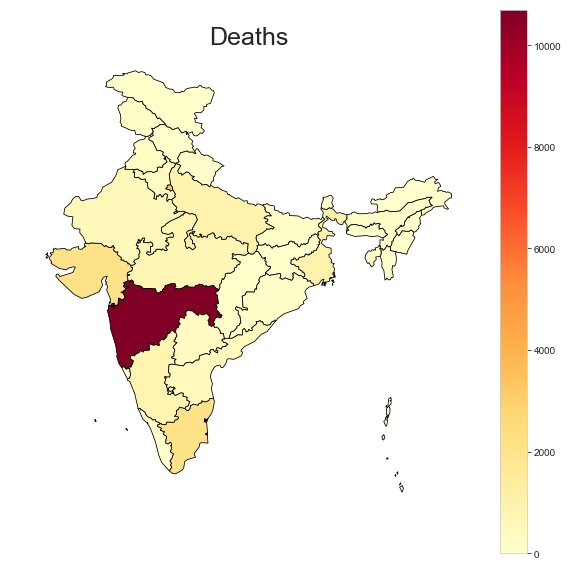

In [13]:
# create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Deaths', fontdict={'fontsize': '25', 'fontweight' : '10'})

# plot the figure
merged.plot(column='Death',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337])
import matplotlib.pyplot as plt
plt.savefig('Deaths.png', dpi=300, bbox_inches='tight')

C:\Users\Ayush\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


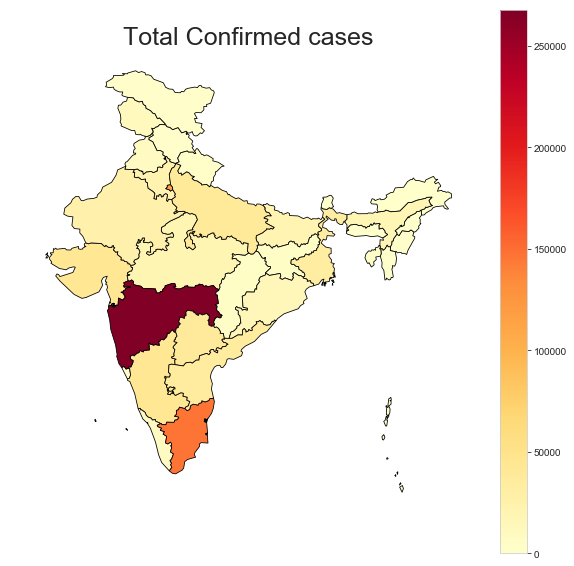

In [14]:
# create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Total Confirmed cases', fontdict={'fontsize': '25', 'fontweight' : '10'})

# plot the figure
merged.plot(column='Total Confirmed cases',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337])
import matplotlib.pyplot as plt
plt.savefig('Confirmed.png', dpi=300, bbox_inches='tight')

C:\Users\Ayush\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


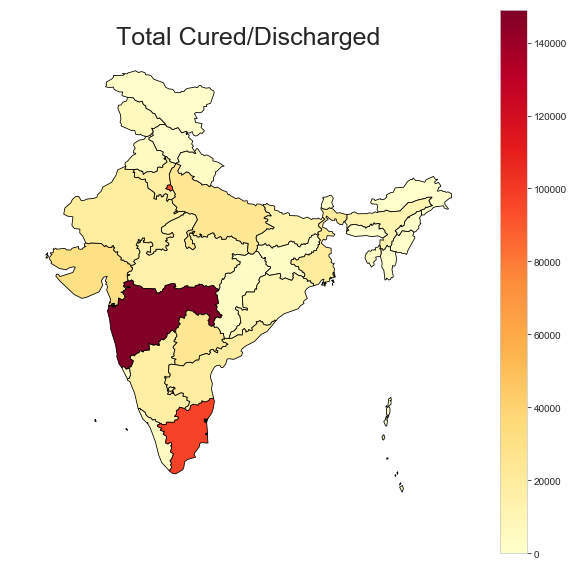

In [15]:
# create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Total Cured/Discharged', fontdict={'fontsize': '25', 'fontweight' : '10'})

# plot the figure
merged.plot(column='Cured/Discharged',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337])
import matplotlib.pyplot as plt
plt.savefig('Cured.png', dpi=300, bbox_inches='tight')

C:\Users\Ayush\Anaconda3\lib\site-packages\matplotlib\colors.py:512: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


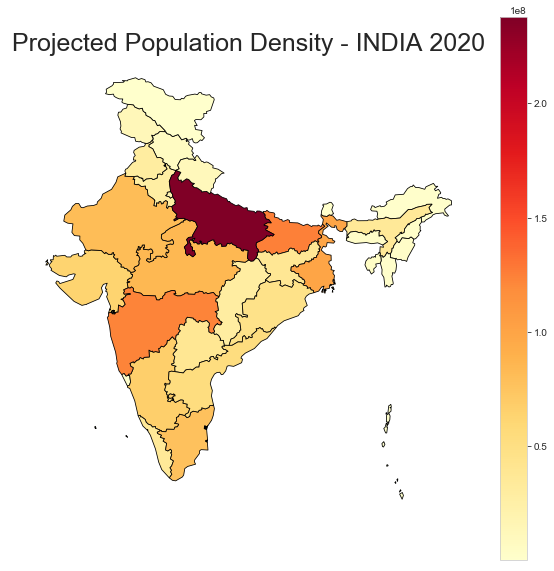

In [27]:
#source for Population Projection - https://uidai.gov.in/images/state-wise-aadhaar-saturation.pdf 

#Reading the excel
data_df = pd.read_csv(r'India_projected_population_2020.csv')

#Merging the data
merged = map_df.set_index('st_nm').join(data_df.set_index('State Name'))

# create figure and axes for Matplotlib and set the title
fig, ax = plt.subplots(1, figsize=(10, 10))
ax.axis('off')
ax.set_title('Projected Population Density - INDIA 2020', fontdict={'fontsize': '25', 'fontweight' : '10'})

# plot the figure
merged.plot(column='Projected Population',cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0', legend=True,markersize=[39.739192, -104.990337])
import matplotlib.pyplot as plt
plt.savefig('population_density.png', dpi=300, bbox_inches='tight')

# Using GeoPlot

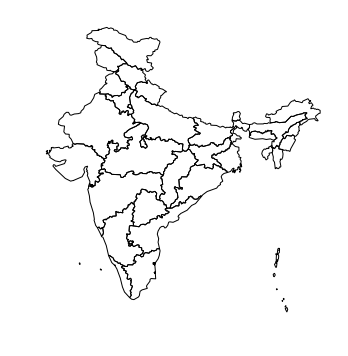

In [7]:
gplt.polyplot(merged)

C:\Users\Ayush\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Ayush\Anaconda3\lib\site-packages\mapclassify\classifiers.py:418: RuntimeWarning: invalid value encountered in greater
  binIds += (x > l) * (x <= r) * k
C:\Users\Ayush\Anaconda3\lib\site-packages\mapclassify\classifiers.py:418: RuntimeWarning: invalid value encountered in less_equal
  binIds += (x > l) * (x <= r) * k
C:\Users\Ayush\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3250: RuntimeWarning: Invalid value encountered in median
  r = func(a, **kwargs)


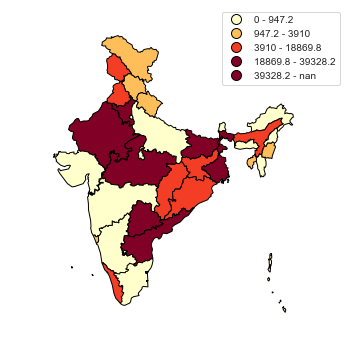

In [8]:
gplt.choropleth(
    merged, hue='Total Confirmed cases', projection=gcrs.AlbersEqualArea(),
    edgecolor='black', linewidth=1,
    cmap='YlOrRd', legend=True
)

# Using Folium

In [9]:
import folium as flm
from folium import plugins
import ipywidgets
import geocoder
import geopy
import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'folium'

In [ ]:
import json

# load geo_json
# shapefiles can be converted to geojson with QGIS
with open(r'Indian_States') as f:
    geojson_counties = json.load(f)

In [ ]:
for i in geojson_counties['features']:
    i['id'] = i['properties']['NAME_1']
    
# load data associated with geo_json
pop_df = pd.read_excel(r'data_ecxel.xlsx')
pop_df.head()

In [ ]:
map1 = flm.Map(location=[20.5937,78.9629], zoom_start=4)

In [ ]:
flm.Choropleth(
    geo_data=geojson_counties,
    name='choropleth',
    data=pop_df,
    columns=['Name of State / UT', 'Total Confirmed cases'],
    # see folium.Choropleth? for details on key_on
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.5,
    line_opacity=0.5).add_to(map1)

# layer control to turn choropleth on or off
flm.LayerControl().add_to(map1)

# display map
map1